<a href="https://colab.research.google.com/github/mar25-iia2-radiographies/01_data_exploration/blob/main/Mathilde_explo_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Garder en tête:
# Pas un diagnostic définitif
# C’est un outil d’aide à la décision médicale
# Les faux négatifs sont plus graves que les faux positifs

# Peut-on distinguer
# à partir d’images de radiographies pulmonaires
# les patients atteints du Covid-19 des patients sains ou atteints d’autres pneumonies ?

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mathildelhommelet","key":"71d99a2d13a69d4d9aa944231eb4a863"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database


Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
 99% 770M/778M [00:02<00:00, 254MB/s]
100% 778M/778M [00:02<00:00, 348MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

In [ ]:
import os

base_path = "/content/COVID-19_Radiography_Dataset/COVID/images"
os.listdir(base_path)

COVID

In [ ]:
import os
import pandas as pd

covid_path = "/content/COVID-19_Radiography_Dataset/COVID/"
image_extensions = (".png", ".jpg", ".jpeg")

data = []

for label in os.listdir(covid_path):
    folder = os.path.join(covid_path, label)

    if os.path.isdir(folder):
        images = [
            f for f in os.listdir(folder)
            if f.lower().endswith(image_extensions)
            and os.path.isfile(os.path.join(folder, f))
        ]

        data.append({
            "classe": label,
            "nb_images": len(images)
        })

df_covid = pd.DataFrame(data)
df_covid


,classe,nb_images
0,images,3616
1,masks,3616


In [ ]:
co_path = "/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx"
lo_path = "/content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx"
nor_path = "/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx"
pneu_path = "/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
test="/content/COVID-19_Radiography_Dataset/Lung_Opacity"
covid = pd.read_excel(co_path)
display(covid.head())
lung = pd.read_excel(lo_path)
display(lung.head())
normal = pd.read_excel(nor_path)
display(normal.head())
viral = pd.read_excel(pneu_path)
display(viral.head())

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [ ]:
import os
import pandas as pd
from PIL import Image

folders = {
    "COVID": "/content/COVID-19_Radiography_Dataset/COVID",
    "Normal": "/content/COVID-19_Radiography_Dataset/Normal",
    "Viral Pneumonia": "/content/COVID-19_Radiography_Dataset/Viral Pneumonia",
    "Lung_Opacity": "/content/COVID-19_Radiography_Dataset/Lung_Opacity"
}

image_extensions = (".png", ".jpg", ".jpeg")

all_data = []

for classe, path in folders.items():
    for root, dirs, files in os.walk(path):
        for f in files:
            if f.lower().endswith(image_extensions):
                filepath = os.path.join(root, f)
                try:
                    img = Image.open(filepath)
                    width, height = img.size
                except:
                    width, height = None, None  # si image corrompue
                all_data.append({
                    "filepath": filepath,
                    "classe": classe,
                    "filename": f,
                    "extension": f.split(".")[-1].lower(),
                    "width": width,
                    "height": height
                })

df_total = pd.DataFrame(all_data)

df_total.head()


,filepath,classe,filename,extension,width,height
0,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID,COVID-119.png,png,299,299
1,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID,COVID-1640.png,png,299,299
2,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID,COVID-869.png,png,299,299
3,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID,COVID-1561.png,png,299,299
4,/content/COVID-19_Radiography_Dataset/COVID/im...,COVID,COVID-84.png,png,299,299


lung_opacity

In [ ]:

lung_opacity_path = "/content/COVID-19_Radiography_Dataset//"
image_extensions = (".png", ".jpg", ".jpeg")

data = []

for label in os.listdir(lung_opacity_path):
    folder = os.path.join(lung_opacity_path, label)

    if os.path.isdir(folder):
        images = [
            f for f in os.listdir(folder)
            if f.lower().endswith(image_extensions)
            and os.path.isfile(os.path.join(folder, f))
        ]

        data.append({
            "classe": label,
            "nb_images": len(images)
        })

df_lung_opacity = pd.DataFrame(data)
df_lung_opacity

,filepath,classe
0,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity
1,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity
2,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity
3,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity
4,/content/COVID-19_Radiography_Dataset/Lung_Opa...,Lung_Opacity


Normal

In [ ]:

normal_path = "/content/COVID-19_Radiography_Dataset/Normal/"
image_extensions = (".png", ".jpg", ".jpeg")

data = []

for label in os.listdir(normal_path):
    folder = os.path.join(normal_path, label)

    if os.path.isdir(folder):
        images = [
            f for f in os.listdir(folder)
            if f.lower().endswith(image_extensions)
            and os.path.isfile(os.path.join(folder, f))
        ]

        data.append({
            "classe": label,
            "nb_images": len(images)
        })

df_normal = pd.DataFrame(data)
df_normal

,classe,nb_images
0,images,10192
1,masks,10192


Viral

In [ ]:

viral_path = "/content/COVID-19_Radiography_Dataset/Viral Pneumonia/"
image_extensions = (".png", ".jpg", ".jpeg")

data = []

for label in os.listdir(viral_path):
    folder = os.path.join(viral_path, label)

    if os.path.isdir(folder):
        images = [
            f for f in os.listdir(folder)
            if f.lower().endswith(image_extensions)
            and os.path.isfile(os.path.join(folder, f))
        ]

        data.append({
            "classe": label,
            "nb_images": len(images)
        })

df_viral = pd.DataFrame(data)
df_viral

,classe,nb_images
0,images,1345
1,masks,1345


Concat

In [ ]:
df_count = pd.concat([df_viral, df_normal, df_covid, df_lung_opacity], ignore_index=True)

df_count

,classe,nb_images
0,images,1345
1,masks,1345
2,images,10192
3,masks,10192
4,images,3616
5,masks,3616
6,images,6012
7,masks,6012


#NOmbre image par classe

In [ ]:
df_counts = df_total.groupby("classe")["filepath"].count().reset_index()
df_counts.rename(columns={"filepath":"nb_images"}, inplace=True)
print(df_counts)

            classe  nb_images
0            COVID       7232
1     Lung_Opacity      12024
2           Normal      20384
3  Viral Pneumonia       2690


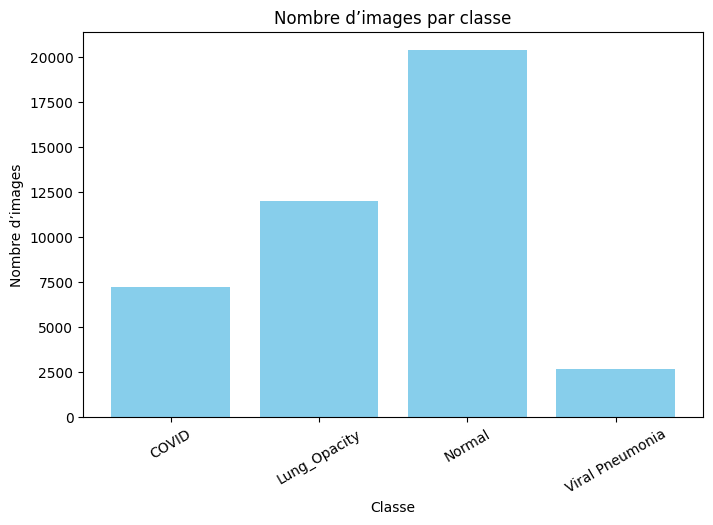

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_counts["classe"], df_counts["nb_images"], color='skyblue')
plt.title("Nombre d’images par classe")
plt.xlabel("Classe")
plt.ylabel("Nombre d’images")
plt.xticks(rotation=30)
plt.show()

déséquilibre des classes +++ -> expliquer le préprocessing.

# exploration visuelle

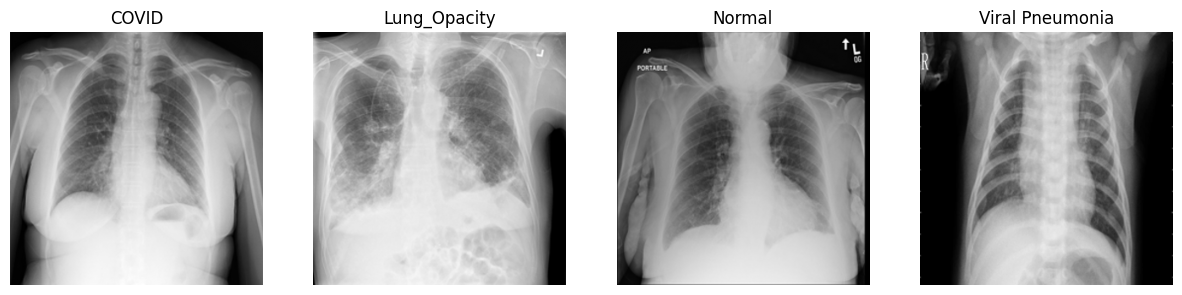

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
for ax, classe in zip(axes, df_counts["classe"]):
    # prendre une image aléatoire par classe
    img_path = df_total[df_total["classe"]==classe]["filepath"].iloc[0]
    img = Image.open(img_path)
    ax.imshow(img, cmap="gray")
    ax.set_title(classe)
    ax.axis("off")
plt.show()

les différences à l’œil nu sont subtiles justifiant l’usage du deep learning.

#Distribution tailles imagezs

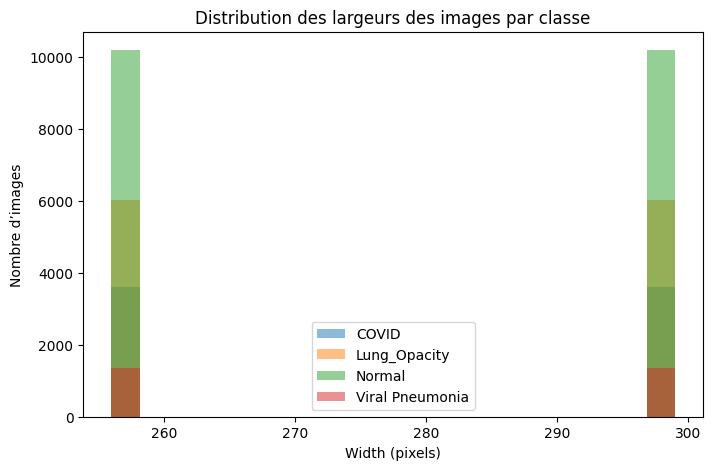

In [ ]:
plt.figure(figsize=(8,5))
for classe in df_counts["classe"]:
    subset = df_total[df_total["classe"]==classe]
    plt.hist(subset["width"], bins=20, alpha=0.5, label=classe)
plt.title("Distribution des largeurs des images par classe")
plt.xlabel("Width (pixels)")
plt.ylabel("Nombre d’images")
plt.legend()
plt.show()


#Intensité moyenne pixels/classe

In [ ]:
import numpy as np

In [ ]:
mean_intensities = []
for classe in df_counts["classe"]:
    subset = df_total[df_total["classe"]==classe].head(50)  # pour limiter le temps
    intensities = []
    for f in subset["filepath"]:
        img = Image.open(f).convert("L")  # mettre en gris
        intensities.append(np.mean(np.array(img)))
    mean_intensities.append({"classe": classe, "mean_intensity": np.mean(intensities)})

df_intensity = pd.DataFrame(mean_intensities)
print(df_intensity)

            classe  mean_intensity
0            COVID      138.699034
1     Lung_Opacity      126.926046
2           Normal      131.430669
3  Viral Pneumonia      129.668932


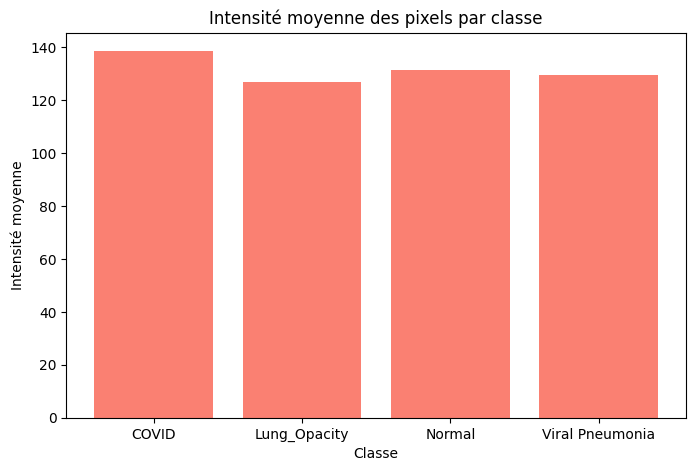

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(df_intensity["classe"], df_intensity["mean_intensity"], color='salmon')
plt.title("Intensité moyenne des pixels par classe")
plt.xlabel("Classe")
plt.ylabel("Intensité moyenne")
plt.show()

révèle différences de contraste/éclairage

#Test statistique t de student, compare Covid vs Normal

Student entre COVID intensité moyenne des pixels et Normal intensité moyenne des pixels

H0: les moyennes des deux classes sont égales= pas de diff
𝐻1:les moyennes sont différentes

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
covid_pixels = []
normal_pixels = []

In [ ]:
# on prend 50 images max par classe pour le test
for f in df_total[df_total["classe"]=="COVID"]["filepath"].head(50):
    img = Image.open(f).convert("L")
    covid_pixels.append(np.mean(np.array(img)))

for f in df_total[df_total["classe"]=="Normal"]["filepath"].head(50):
    img = Image.open(f).convert("L")
    normal_pixels.append(np.mean(np.array(img)))

t_stat, p_val = ttest_ind(covid_pixels, normal_pixels)
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

T-statistic: 2.47, p-value: 0.0141


#Résultat: p-value = 0.0141<0.05 = On rejette H0 donc: différence entre l’intensité moyenne des pixels des images COVID et Normal

images COVID ont en moyenne une intensité différente des images normales.

Peut être exploité par un modèle de classification mais la différence moyenne ne garantit pas que toutes les images soient facilement séparables
 et en plus xd'autres facteurs: contraste, résolution, artefacts peuvent influencer le modèle

#Prochaine étape: Préprocessing

L'exploraiton montre un déséquilibre des classes, Hétérogénéité des images
et différences visuelles exploitables

Donc il faudra :
Normaliser
Équilibrer
Encoder les labels (COVID -> 1 Normal -> 0 Viral Pneumonia -> 2 Lung_Opacity -> 3)
Préparer des loaders TensorFlow / PyTorch : faire des batch : images sont dans des fichiers donc pas en mémoire.Pour l’entraînement, il faut les charger par batch et maybe une augmentation de données ? petits sous-ensembles:  32 ou 64 images par lot.
Peu d'image en covid et penumo viral donc  riosque de overfitting donc faire rotation d'image de quelques degrés, faire miroir vertic ou horizontal, zoom sur une partie, translation ou changement de luminosité/contraste pour créer plus de diversité et rend modele plus robuste

#Etape 2